# This is code for checking consistency of ABCD connectivities

*** Before preprocess and calculate resting-state functional connectivity of SNUH data, we made sure that calculation of ours is consistent with the result using ABCD-HCP-pipeline from DCAN labs *** 

- This is not necessary to preprocess & run codes, so I recommend to read through just to check
- Gordon parcellation files can be downloaded on Gordon's original paper

In [2]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import seaborn as sns
import scipy.stats as stats
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm

In [3]:
def plot_gordon_mat(mat,zscore=False):
    tot_rois = 352
    if zscore:
        temp_fc_mat = np.array(stats.zscore(mat))
    else: temp_fc_mat = np.array(mat)

    wfm = np.zeros((tot_rois, tot_rois))
    iu_non_di_idx = np.mask_indices(tot_rois, np.triu, 1)
    wfm[iu_non_di_idx] = temp_fc_mat.ravel()
    il_idx = np.tril_indices(352, -1)
    wfm[il_idx] = wfm.T[il_idx]
    fig, ax = plt.subplots(figsize=(24, 20))
    sns.heatmap(wfm, square=True, cmap='RdBu', ax=ax, vmax=1.5, vmin=-1.5)
    ax.set_xticklabels(""); ax.set_yticklabels("")
    plt.show()
    return

In [4]:
#Time-series data preprocessed using ABCD-HCP-pipeline
root_direc = "/data5/open_data/ABCD/rest/derivatives/abcd-hcp-pipeline/"
sub_list = [i for i in os.listdir(root_direc) if 'sub-' in i]

print("Number of total subjects : ",len(sub_list))

Number of total subjects :  9668


In [5]:
#Select few subjects for visual check
sample_num = 10

selected_sbj_list = random.sample(sub_list,sample_num)
selected_sbj_sample = selected_sbj_list[0]

print("Selected subject : ",selected_sbj_list)

Selected subject :  ['sub-NDARINV0EV57VEX', 'sub-NDARINVHZ1URTX6', 'sub-NDARINV9DV0865Y', 'sub-NDARINVLB0H15T3', 'sub-NDARINVA1A2WJG5', 'sub-NDARINVDVMAP47N', 'sub-NDARINV56VJH1CR', 'sub-NDARINVA2T7V5L9', 'sub-NDARINV9D4JG706', 'sub-NDARINVCBLVCZDM']


## RSFC calculation check pipeline

In [6]:
tot_rois = 352 #Total number of ROIs (Gordon + subcortical)
float_th = 3 #Floating threshold

#Gordonparcel
parc_path = "/data4/SNU/data/Gordon_352_parc.dlabel.nii"
parc_map_nii = nib.load(parc_path)
parc_map_arr = np.array(parc_map_nii.dataobj)
parc_map_arr.shape

(1, 91282)

===========Given data info from DCAN================
sub-NDARINV0EV57VEX
Original timeseries shape :  (1532, 91282)
Gordon parcellated timeseries shape :  (1532, 352)
Ceonsor df shape :  (1532, 1)
Ceonsor value info :  ['1 ==> 1369', '0 ==> 163']
Gordon parcellated timeseries shape - censored:  (1369, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1547', '1 ==> 537717']
RSFC Overlap value info :  ['1 ==> 123904']


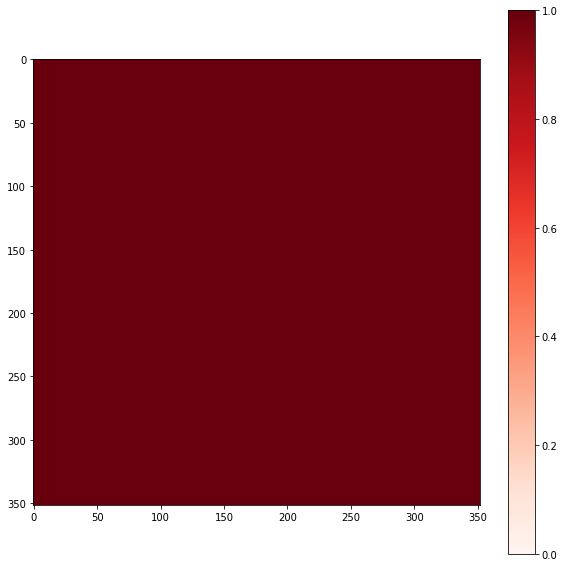

sub-NDARINV0EV57VEX (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVHZ1URTX6
Original timeseries shape :  (1149, 91282)
Gordon parcellated timeseries shape :  (1149, 352)
Ceonsor df shape :  (1149, 1)
Ceonsor value info :  ['1 ==> 938', '0 ==> 211']
Gordon parcellated timeseries shape - censored:  (938, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1137', '1 ==> 403311']
RSFC Overlap value info :  ['1 ==> 123904']


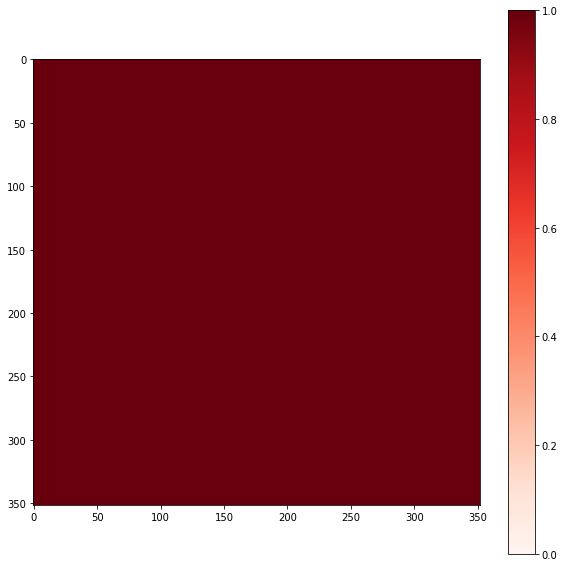

sub-NDARINVHZ1URTX6 (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINV9DV0865Y
Original timeseries shape :  (1520, 91282)
Gordon parcellated timeseries shape :  (1520, 352)
Ceonsor df shape :  (1520, 1)
Ceonsor value info :  ['1 ==> 1375', '0 ==> 145']
Gordon parcellated timeseries shape - censored:  (1375, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1592', '1 ==> 533448']
RSFC Overlap value info :  ['0 ==> 2', '1 ==> 123902']


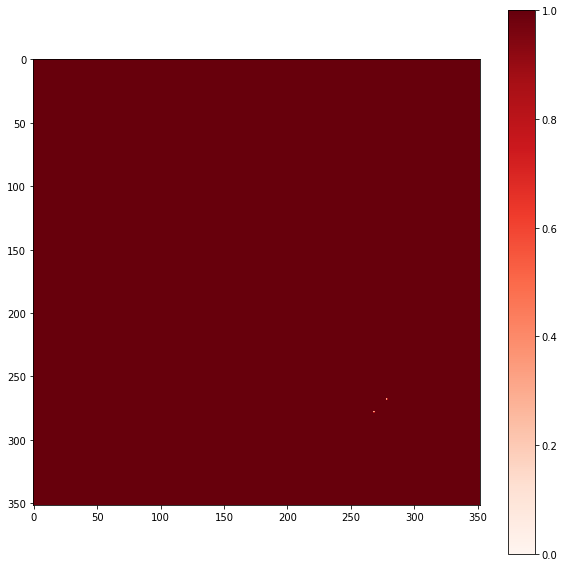

sub-NDARINV9DV0865Y (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVLB0H15T3
Original timeseries shape :  (1564, 91282)
Gordon parcellated timeseries shape :  (1564, 352)
Ceonsor df shape :  (1564, 1)
Ceonsor value info :  ['1 ==> 1399', '0 ==> 165']
Gordon parcellated timeseries shape - censored:  (1399, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1713', '1 ==> 548815']
RSFC Overlap value info :  ['0 ==> 2', '1 ==> 123902']


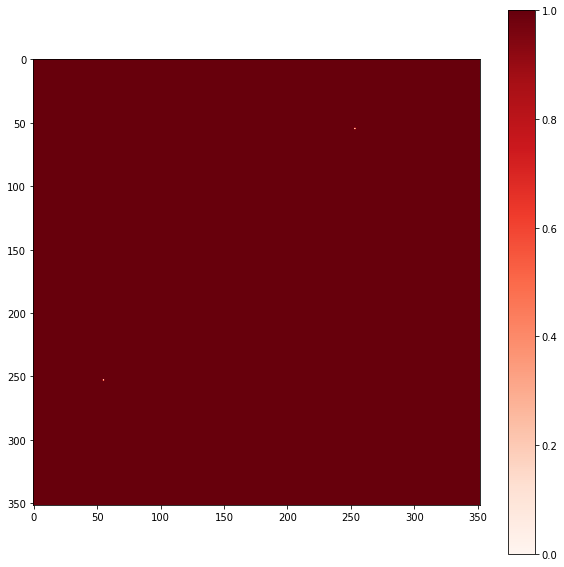

sub-NDARINVLB0H15T3 (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVA1A2WJG5
Original timeseries shape :  (1945, 91282)
Gordon parcellated timeseries shape :  (1945, 352)
Ceonsor df shape :  (1945, 1)
Ceonsor value info :  ['1 ==> 1058', '0 ==> 887']
Gordon parcellated timeseries shape - censored:  (1058, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1804', '1 ==> 682836']
RSFC Overlap value info :  ['0 ==> 121270', '1 ==> 2634']


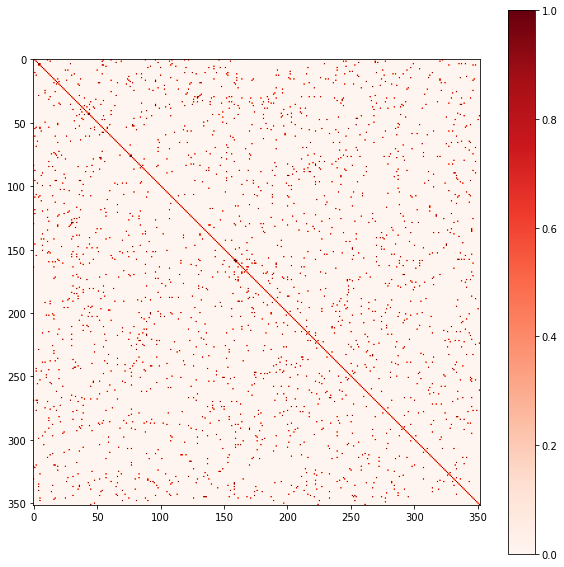

sub-NDARINVA1A2WJG5 (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVDVMAP47N
Original timeseries shape :  (1532, 91282)
Gordon parcellated timeseries shape :  (1532, 352)
Ceonsor df shape :  (1532, 1)
Ceonsor value info :  ['1 ==> 1397', '0 ==> 135']
Gordon parcellated timeseries shape - censored:  (1397, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1487', '1 ==> 537777']
RSFC Overlap value info :  ['0 ==> 8', '1 ==> 123896']


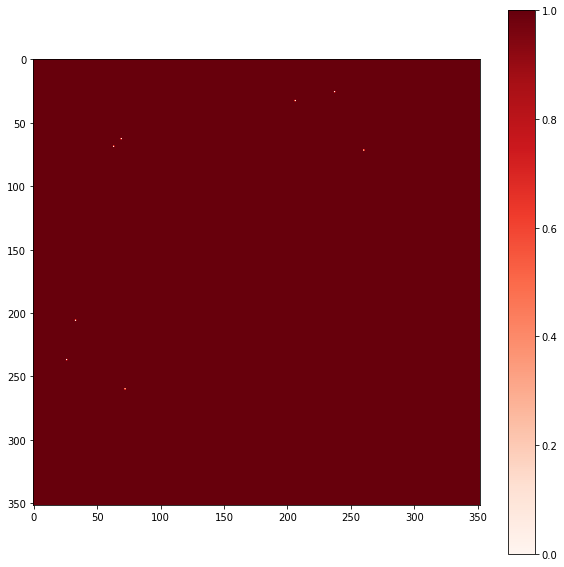

sub-NDARINVDVMAP47N (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINV56VJH1CR
Original timeseries shape :  (1520, 91282)
Gordon parcellated timeseries shape :  (1520, 352)
Ceonsor df shape :  (1520, 1)
Ceonsor value info :  ['0 ==> 1444', '1 ==> 76']
Gordon parcellated timeseries shape - censored:  (76, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1943', '1 ==> 533097']
RSFC Overlap value info :  ['0 ==> 122786', '1 ==> 1118']


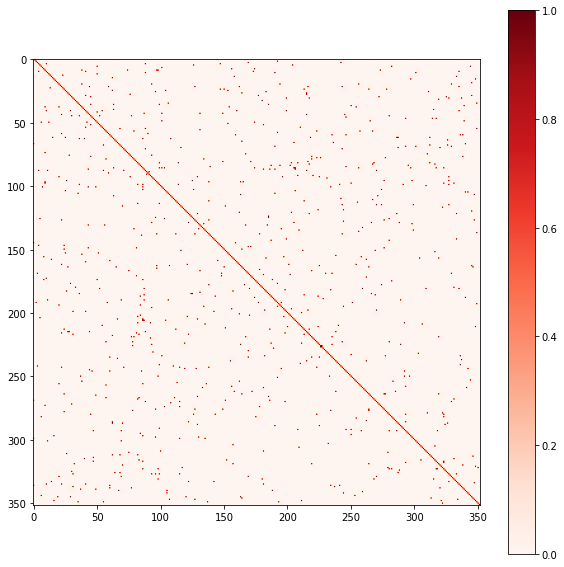

sub-NDARINV56VJH1CR (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVA2T7V5L9
Original timeseries shape :  (1532, 91282)
Gordon parcellated timeseries shape :  (1532, 352)
Ceonsor df shape :  (1532, 1)
Ceonsor value info :  ['1 ==> 853', '0 ==> 679']
Gordon parcellated timeseries shape - censored:  (853, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1789', '1 ==> 537475']
RSFC Overlap value info :  ['1 ==> 123904']


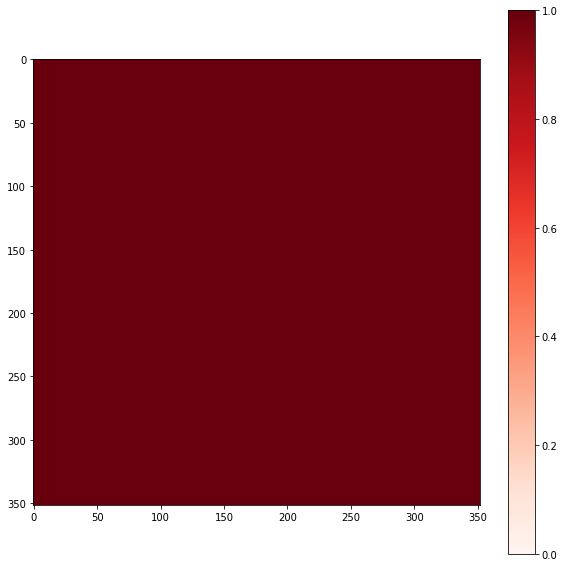

sub-NDARINVA2T7V5L9 (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINV9D4JG706
Original timeseries shape :  (1532, 91282)
Gordon parcellated timeseries shape :  (1532, 352)
Ceonsor df shape :  (1532, 1)
Ceonsor value info :  ['1 ==> 915', '0 ==> 617']
Gordon parcellated timeseries shape - censored:  (915, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1935', '1 ==> 537329']
RSFC Overlap value info :  ['1 ==> 123904']


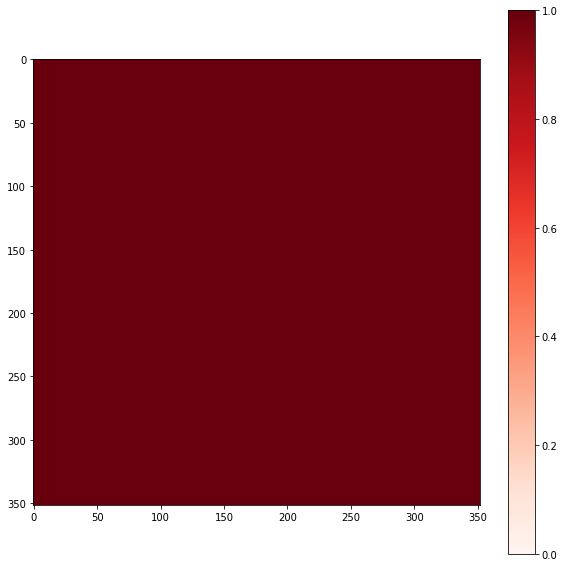

sub-NDARINV9D4JG706 (61776,)
------------Replication End---------------
===========Given data info from DCAN================
sub-NDARINVCBLVCZDM
Original timeseries shape :  (1532, 91282)
Gordon parcellated timeseries shape :  (1532, 352)
Ceonsor df shape :  (1532, 1)
Ceonsor value info :  ['0 ==> 1481', '1 ==> 51']
Gordon parcellated timeseries shape - censored:  (51, 352)
RSFC shape :  (352, 352)
------------Replication Start---------------
Timeseries Overlap value info :  ['0 ==> 1554', '1 ==> 537710']
RSFC Overlap value info :  ['0 ==> 8', '1 ==> 123896']


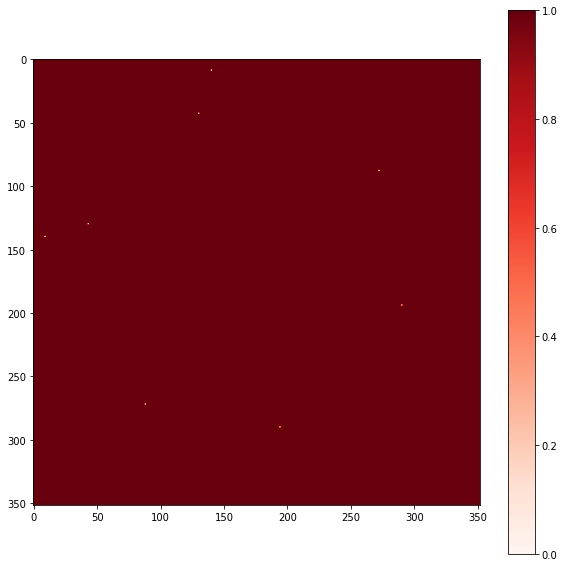

sub-NDARINVCBLVCZDM (61776,)
------------Replication End---------------


In [7]:
RSFC_mat_list = []
RSFC_list = []
RSFC_sbj = []

for selected_sbj in selected_sbj_list:
    try:
        print("===========Given data info from DCAN================")
        print(selected_sbj)

        #Original timeseries
        ori_pts = np.array(nib.load(root_direc+selected_sbj + f"/ses-baselineYear1Arm1/func/{selected_sbj}_ses-baselineYear1Arm1_task-rest_bold_desc-filtered_timeseries.dtseries.nii").dataobj)
        print("Original timeseries shape : ",ori_pts.shape)

        #Assigned timeseries to Gordon parcellation
        gordon_pts = np.array(nib.load(root_direc+selected_sbj + f"/ses-baselineYear1Arm1/func/{selected_sbj}_ses-baselineYear1Arm1_task-rest_bold_atlas-Gordon2014FreeSurferSubcortical_desc-filtered_timeseries.ptseries.nii").dataobj)
        print("Gordon parcellated timeseries shape : ",gordon_pts.shape)

        #Censored timeseries information
        censor = pd.read_csv(root_direc+selected_sbj + f"/ses-baselineYear1Arm1/func/{selected_sbj}_ses-baselineYear1Arm1_task-rest_bold_atlas-Gordon2014FreeSurferSubcortical_desc-filtered_timeseries_thresh-fd0p2mm_censor-belowthresh_conndata-network_censor.txt",header=None)
        print("Ceonsor df shape : ",censor.shape)
        print("Ceonsor value info : ",[f"{i} ==> {j}" for i,j in zip(censor[0].value_counts().keys(),censor[0].value_counts().values)])

        gordon_pts_censored = gordon_pts[np.array(censor[0],dtype=bool)]
        print("Gordon parcellated timeseries shape - censored: ",gordon_pts_censored.shape)

        #Pconn - Gordon
        pconn = np.array(nib.load(root_direc+selected_sbj + f"/ses-baselineYear1Arm1/func/{selected_sbj}_ses-baselineYear1Arm1_task-rest_bold_atlas-Gordon2014FreeSurferSubcortical_desc-filtered_timeseries_thresh-fd0p2mm_censor-belowthresh_conndata-network_connectivity.pconn.nii").dataobj)
        print("RSFC shape : ",pconn.shape)

        print("------------Replication Start---------------")
        tot_vols = len(ori_pts)
        parc_bold = np.zeros((tot_vols, tot_rois), dtype=np.float32)

        for roi_idx in range(1, tot_rois + 1):
            roi_pos = ((parc_map_arr == roi_idx)).ravel()
            avg_bold = np.mean(ori_pts[:, roi_pos], axis=1).reshape(-1, 1)
            parc_bold[:, [roi_idx - 1]] = avg_bold

        parc_bold_cs = parc_bold[np.array(censor[0],dtype=bool)]

        corr_mat = np.corrcoef(parc_bold_cs, rowvar=False).astype(np.float32)
        corr_mat_rtoz = np.arctanh(corr_mat-np.diag([1]*tot_rois)*1e-6).astype(np.float32)

        corr_mat_upper = corr_mat_rtoz[np.triu_indices(tot_rois, k=1)]

        #Check timeseries overlap
        overlap_ts = np.array(np.round(parc_bold,float_th) == np.round(gordon_pts,float_th),dtype=int)
        ov_ts_key,ov_ts_values = np.unique(overlap_ts,return_counts=True)
        print("Timeseries Overlap value info : ",[f"{i} ==> {j}" for i,j in zip(ov_ts_key,ov_ts_values)])

        #Check RSFC overlap                               
        overlap_fc = np.array(np.round(corr_mat_rtoz,float_th) == np.round(pconn,float_th),dtype=int)
        ov_fc_key,ov_fc_values = np.unique(overlap_fc,return_counts=True)
        print("RSFC Overlap value info : ",[f"{i} ==> {j}" for i,j in zip(ov_fc_key,ov_fc_values)])

        #Visualize overlap RSFC
        plt.figure(figsize=(10,10))
        plt.imshow(overlap_fc,cmap=cm.Reds,vmin=0,vmax=1)
        plt.colorbar()
        plt.show()

        print(selected_sbj, corr_mat_upper.shape)

        RSFC_mat_list.append(corr_mat_rtoz)
        RSFC_list.append(corr_mat_upper)
        RSFC_sbj.append(selected_sbj)
        print("------------Replication End---------------")
    except:
        continue

In [8]:
for sbj, mat in zip(RSFC_sbj,RSFC_mat_list):
    print(sbj)
    pconn = np.array(nib.load(root_direc+sbj + f"/ses-baselineYear1Arm1/func/{sbj}_ses-baselineYear1Arm1_task-rest_bold_atlas-Gordon2014FreeSurferSubcortical_desc-filtered_timeseries_thresh-fd0p2mm_censor-belowthresh_conndata-network_connectivity.pconn.nii").dataobj)
    match_mat = np.array(np.round(mat,float_th) == np.round(pconn,float_th)).astype(int)
    print(np.unique(match_mat,return_counts=True))
    
    idx_x,idx_y = np.where(match_mat==0)
    if len(idx_x)<10:
        for x,y in zip(idx_x,idx_y):
            print(np.round(mat[x,y],float_th),"<=>",np.round(pconn[x,y],float_th))
    else: print("Not match over 10 connectivity : " ,sbj)
    print("------------------------------------------")

sub-NDARINV0EV57VEX
(array([1]), array([123904]))
------------------------------------------
sub-NDARINVHZ1URTX6
(array([1]), array([123904]))
------------------------------------------
sub-NDARINV9DV0865Y
(array([0, 1]), array([     2, 123902]))
-0.116 <=> -0.117
-0.116 <=> -0.117
------------------------------------------
sub-NDARINVLB0H15T3
(array([0, 1]), array([     2, 123902]))
-0.29 <=> -0.289
-0.29 <=> -0.289
------------------------------------------
sub-NDARINVA1A2WJG5
(array([0, 1]), array([121270,   2634]))
Not match over 10 connectivity :  sub-NDARINVA1A2WJG5
------------------------------------------
sub-NDARINVDVMAP47N
(array([0, 1]), array([     8, 123896]))
0.736 <=> 0.735
0.67 <=> 0.671
0.204 <=> 0.203
0.204 <=> 0.203
-0.168 <=> -0.169
0.67 <=> 0.671
0.736 <=> 0.735
-0.168 <=> -0.169
------------------------------------------
sub-NDARINV56VJH1CR
(array([0, 1]), array([122786,   1118]))
Not match over 10 connectivity :  sub-NDARINV56VJH1CR
-----------------------------

*** It seems RSFC replication is well done, considering many overlaps and tiny differences ***

## Calculate RSFC of SNUH data

In [9]:
cur_sbj_list = np.load("/data4/SNU/data/cur_sbj_list.npz")["X"]
bold_path = "/data4/SNU/data/output/"
bold_sbj_list = [x for x in os.listdir(bold_path) if x in cur_sbj_list]
bold_sbj_list = np.sort(bold_sbj_list)
bold_sbj_list

array(['C001', 'C002', 'C003', 'C004', 'C005', 'C008', 'C009', 'C011',
       'C012', 'C013', 'C014', 'C016', 'C017', 'C018', 'C019', 'C020',
       'C021', 'C022', 'C023', 'C024', 'C026', 'C027', 'C032', 'C034',
       'C035', 'C036', 'C037', 'C038', 'C039', 'C041', 'C042', 'C043',
       'C044', 'C045', 'C046', 'C047', 'C048', 'C049', 'C050', 'C051',
       'C052', 'C053', 'C054', 'C055', 'C056', 'C057', 'P001', 'P003',
       'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011',
       'P012', 'P013', 'P014', 'P015', 'P016', 'P018', 'P019', 'P021',
       'P023', 'P024', 'P025', 'P026', 'P027', 'P028', 'P029', 'P031',
       'P032', 'P033', 'P034', 'P037', 'P038', 'P039', 'P040', 'P041',
       'P042', 'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050',
       'P052', 'P053', 'P054', 'P056', 'P057', 'P058', 'P060', 'P061',
       'P062', 'P063', 'P064', 'P065', 'P066', 'P067', 'P068', 'P069',
       'P070', 'P071', 'P072', 'P074', 'P075', 'P076', 'P077', 'P079',
      

In [10]:
Smoothing = True
GSR = False

In [11]:
SNUH_RSFC_list = []

for i, bold_sbj in enumerate(bold_sbj_list):
    
    bold_sbj_path = os.path.join(bold_path, bold_sbj + "/MNINonLinear")
    if Smoothing ==True:
        bold_sbj_path += "/Results/rest/rest_Atlas_s8.dtseries.nii"
    else:
        bold_sbj_path += "/Results/rest/rest_Atlas_s0.dtseries.nii"
    bold_sbj_nii = nib.load(bold_sbj_path)
    bold_sbj_arr = np.array(bold_sbj_nii.dataobj)
    
    tot_vols = len(bold_sbj_arr)
    if GSR:
        bold_sbj_arr -= np.expand_dims(np.mean(bold_sbj_arr, 1), 1)
    else:
        bold_sbj_arr -= np.expand_dims(np.mean(bold_sbj_arr, 0), 0)
    
    parc_bold = np.zeros((tot_vols, tot_rois), dtype=np.float32)
    
    for roi_idx in range(1, tot_rois + 1):
        roi_pos = ((parc_map_arr == roi_idx)).ravel()
        avg_bold = np.mean(bold_sbj_arr[:, roi_pos], axis=1).reshape(-1, 1)
        parc_bold[:, [roi_idx - 1]] = avg_bold
    
    corr_mat = np.corrcoef(parc_bold, rowvar=False)
    corr_mat_upper = corr_mat[np.triu_indices(tot_rois, k=1)]
    corr_mat_upper[np.where(corr_mat_upper>=1-1e-6)]=1-1e-6
    corr_mat_upper_rtoz = np.arctanh(corr_mat_upper).astype(np.float32)

    print(bold_sbj, corr_mat_upper_rtoz.shape,
          f"Mean:{'%.3f'}, Std:{'%.3f'}, Max:{'%.3f'}, Min:{'%.3f'}" %(np.mean(corr_mat_upper_rtoz),np.std(corr_mat_upper_rtoz),np.max(corr_mat_upper_rtoz),np.min(corr_mat_upper_rtoz)))
    SNUH_RSFC_list.append(corr_mat_upper_rtoz)

C001 (61776,) Mean:0.231, Std:0.235, Max:1.907, Min:-0.520
C002 (61776,) Mean:0.179, Std:0.203, Max:1.591, Min:-0.772
C003 (61776,) Mean:0.219, Std:0.229, Max:1.508, Min:-0.661
C004 (61776,) Mean:0.184, Std:0.224, Max:1.600, Min:-0.869
C005 (61776,) Mean:0.108, Std:0.203, Max:1.745, Min:-0.769
C008 (61776,) Mean:0.240, Std:0.245, Max:1.934, Min:-0.785
C009 (61776,) Mean:0.133, Std:0.234, Max:1.847, Min:-0.703
C011 (61776,) Mean:0.147, Std:0.212, Max:2.105, Min:-0.604
C012 (61776,) Mean:0.093, Std:0.232, Max:1.945, Min:-0.732
C013 (61776,) Mean:0.513, Std:0.307, Max:2.193, Min:-0.534
C014 (61776,) Mean:0.528, Std:0.286, Max:2.011, Min:-0.600
C016 (61776,) Mean:0.150, Std:0.275, Max:2.425, Min:-1.272
C017 (61776,) Mean:0.103, Std:0.243, Max:2.576, Min:-1.460
C018 (61776,) Mean:0.069, Std:0.209, Max:1.601, Min:-0.706
C019 (61776,) Mean:0.260, Std:0.252, Max:1.735, Min:-0.719
C020 (61776,) Mean:0.135, Std:0.241, Max:2.079, Min:-0.705
C021 (61776,) Mean:0.138, Std:0.232, Max:1.738, Min:-0.9

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P001 (61776,) Mean:0.132, Std:0.234, Max:2.160, Min:-0.612
P003 (61776,) Mean:0.261, Std:0.321, Max:2.228, Min:-0.915
P004 (61776,) Mean:0.224, Std:0.214, Max:1.626, Min:-0.536
P005 (61776,) Mean:0.265, Std:0.228, Max:1.635, Min:-0.637
P006 (61776,) Mean:0.213, Std:0.216, Max:1.729, Min:-0.708
P007 (61776,) Mean:0.317, Std:0.265, Max:1.761, Min:-0.921
P008 (61776,) Mean:0.233, Std:0.265, Max:1.798, Min:-0.771
P009 (61776,) Mean:0.107, Std:0.229, Max:1.586, Min:-0.726
P010 (61776,) Mean:0.138, Std:0.219, Max:1.685, Min:-0.923
P011 (61776,) Mean:0.333, Std:0.248, Max:1.775, Min:-0.532
P012 (61776,) Mean:0.132, Std:0.208, Max:1.659, Min:-0.755
P013 (61776,) Mean:0.285, Std:0.227, Max:1.921, Min:-0.505
P014 (61776,) Mean:0.131, Std:0.222, Max:1.927, Min:-0.692
P015 (61776,) Mean:0.084, Std:0.205, Max:1.600, Min:-0.719
P016 (61776,) Mean:0.259, Std:0.250, Max:2.086, Min:-0.643
P018 (61776,) Mean:0.180, Std:0.223, Max:1.685, Min:-0.684
P019 (61776,) Mean:0.184, Std:0.250, Max:1.828, Min:-0.7

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P045 (61776,) Mean:0.177, Std:0.240, Max:1.783, Min:-0.662


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P046 (61776,) Mean:0.083, Std:0.195, Max:1.566, Min:-0.785


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P047 (61776,) Mean:0.222, Std:0.244, Max:2.007, Min:-0.892


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P048 (61776,) Mean:0.520, Std:0.268, Max:2.471, Min:-0.439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P049 (61776,) Mean:0.230, Std:0.240, Max:1.870, Min:-0.940


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P050 (61776,) Mean:0.166, Std:0.253, Max:1.750, Min:-0.807


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P052 (61776,) Mean:0.090, Std:0.213, Max:1.819, Min:-0.839


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P053 (61776,) Mean:0.234, Std:0.243, Max:1.897, Min:-0.875


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P054 (61776,) Mean:0.326, Std:0.262, Max:2.015, Min:-0.530


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P056 (61776,) Mean:0.126, Std:0.255, Max:2.218, Min:-0.935


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P057 (61776,) Mean:0.191, Std:0.232, Max:1.854, Min:-0.618


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P058 (61776,) Mean:0.128, Std:0.228, Max:1.687, Min:-0.755


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P060 (61776,) Mean:0.203, Std:0.235, Max:2.055, Min:-0.882


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P061 (61776,) Mean:0.153, Std:0.209, Max:1.737, Min:-0.574


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P062 (61776,) Mean:0.105, Std:0.215, Max:1.730, Min:-0.753


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P063 (61776,) Mean:0.079, Std:0.212, Max:1.462, Min:-0.747


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P064 (61776,) Mean:0.118, Std:0.245, Max:1.876, Min:-0.682


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P065 (61776,) Mean:0.111, Std:0.209, Max:1.561, Min:-0.726


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P066 (61776,) Mean:0.220, Std:0.253, Max:2.239, Min:-0.754


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P067 (61776,) Mean:0.189, Std:0.236, Max:1.818, Min:-0.601


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P068 (61776,) Mean:0.232, Std:0.243, Max:2.081, Min:-0.822


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P069 (61776,) Mean:0.141, Std:0.247, Max:2.900, Min:-1.181


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P070 (61776,) Mean:0.214, Std:0.237, Max:2.003, Min:-1.041


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P071 (61776,) Mean:0.096, Std:0.203, Max:1.424, Min:-0.725


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P072 (61776,) Mean:0.161, Std:0.208, Max:1.710, Min:-0.778


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P074 (61776,) Mean:0.230, Std:0.244, Max:1.772, Min:-0.531


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P075 (61776,) Mean:0.280, Std:0.244, Max:1.775, Min:-0.591


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P076 (61776,) Mean:0.170, Std:0.269, Max:1.930, Min:-0.578


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P077 (61776,) Mean:0.175, Std:0.212, Max:1.821, Min:-0.542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P079 (61776,) Mean:0.162, Std:0.222, Max:1.985, Min:-1.155


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P080 (61776,) Mean:0.088, Std:0.250, Max:2.138, Min:-0.813
P081 (61776,) Mean:0.087, Std:0.183, Max:1.580, Min:-0.792
P082 (61776,) Mean:0.235, Std:0.254, Max:1.811, Min:-0.839
P083 (61776,) Mean:0.197, Std:0.246, Max:1.744, Min:-0.790
P084 (61776,) Mean:0.309, Std:0.247, Max:2.265, Min:-0.732


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P085 (61776,) Mean:0.103, Std:0.235, Max:1.819, Min:-0.737


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P086 (61776,) Mean:0.380, Std:0.245, Max:2.096, Min:-0.625


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P087 (61776,) Mean:0.203, Std:0.228, Max:2.004, Min:-0.580
P088 (61776,) Mean:0.092, Std:0.220, Max:2.549, Min:-0.779


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P090 (61776,) Mean:0.212, Std:0.223, Max:1.749, Min:-0.543


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P091 (61776,) Mean:0.112, Std:0.296, Max:2.220, Min:-1.352


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P093 (61776,) Mean:0.305, Std:0.266, Max:2.024, Min:-0.846


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


P095 (61776,) Mean:0.129, Std:0.224, Max:1.976, Min:-0.592


In [29]:
# np.savez("/users/hjd/IG_my_study/SNUH/code/Github_upload/files/SNUH_RSFC.npz",
#          subjectkey=bold_sbj_list, X = SNUH_RSFC_list)